## CV19 Vaccine Progress 

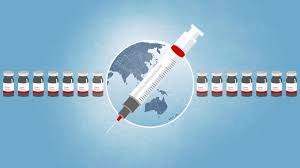

"I'd much rather have a vaccine than this virus' - Paul A Voldenburg MD <br>
"We were standing on one side of a massive river of uncertainty and hardship... we’re now seeing the other side of the river” Christine LaGarde, President ECB

<b>Purpose:</b> To explore the CV19 Vaccination dataset with the below ideas<br>
* Split into segments and view vaccincation progress
* View mapping of world charts as above and what countries are using what vaccines
* Time to threshold (e.g. 50%, 75%) vaccincated population, based on forecast, assuming same trends continue.



### 1. Import Data

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Import CV19 vaccination dataset
df = pd.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv',engine='python')
df.head()

In [ ]:
#Import economic dataset
gm = pd.read_csv('/kaggle/input/gap-minder-gdpgrowth/gapminder_tidy.csv',engine='python')
gm.head()

In [ ]:
#how many countries are present in the dataset
df['country'].nunique()

In [ ]:
#Number of countries
df.country.unique()

In [ ]:
#get most recent year available from gapminder data 
gm_max_year = gm.groupby(['Country'])['Year'].max().reset_index()

In [ ]:
gm_max_year

In [ ]:
#Join back to iteself to get the latest year available in economic data
gm_max = gm.merge(gm_max_year,how='inner',on=['Country','Year'])

In [ ]:
#Join to main dataset
df_gm = df.merge(gm_max,how='left',left_on='country',right_on='Country')

In [ ]:
df_gm.head()

In [ ]:
#GDP per capita
df_gm['gdp_per_capita'] = df_gm['gdp'] / df_gm['population']

In [ ]:
df_gm.isna().sum()

In [ ]:
df_gm['region'] = df_gm['region'].fillna('Other')
df_gm['population'] = df_gm['population'].fillna(df_gm['population'].mean())
df_gm['life'] = df_gm['life'].fillna(df_gm['life'].mean())
df_gm['gdp'] = df_gm['gdp'].fillna(df_gm['gdp'].mean())

In [ ]:
#Some data quality issues with null data
df_gm[df_gm['country']=='China'].tail()

In [ ]:
#Fill NaN values for 'people_vaccinated_per_hundred'
#Assume that people require 2 vaccinations
df_gm['people_fully_vaccinated_per_hundred'] =  np.where(df_gm['people_fully_vaccinated_per_hundred'].isna(),
                                                   (df_gm['total_vaccinations_per_hundred'] /2)  ,
                                                   df_gm['people_fully_vaccinated_per_hundred'])

In [ ]:
df_gm[df_gm['country']=='China'].tail()

### 2. Vaccination rates by region, by gdp, by life expectancy etc.

#### 2.1 Region

In [ ]:
#Region plot
graph = sns.lineplot(data=df_gm.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='region')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

> #### 2.2 GDP

In [ ]:
#GDP plot
df_gm['gdp_grp'] = pd.qcut(df_gm['gdp'],q=5)
graph = sns.lineplot(data=df_gm.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='gdp_grp')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

#### 2.3 Life Expectancy

In [ ]:
#Life expectancy plot
df_gm['life_grp'] = pd.qcut(df_gm['life'],q=5)
graph = sns.lineplot(data=df_gm.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='life_grp')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

#### 2.4 Population

In [ ]:
#Population plot
df_gm['population_grp'] = pd.qcut(df_gm['population'],q=5)
graph = sns.lineplot(data=df_gm.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='population_grp')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

#### 2.5 Top 10 GDP countries in the world vaccination rates

In [ ]:
#Top 10 GDP countries in the world vaccination rates
graph = sns.lineplot(data=df_gm[df_gm['iso_code'].isin(['GBR','IDN','BRA','RUS','DEU','JPN','IND','USA','CHN'])]
                     .sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='country')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

#### 2.6 Overall

In [ ]:
#Overall plot
import matplotlib.dates as mdates
graph = sns.lineplot(data=df.sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred")
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

### 3. World Map Plots

In [ ]:
df_gm['vaccines'].unique()

In [ ]:
#Origin of Vaccine, noting some are collaborations between nations/ continents, notably Pfizer/BioNTech is counted against both European/ American.
df_gm['American_Vaccine'] = np.where(df_gm['vaccines'].str.contains('Johnson&Johnson|Moderna|Pfizer'),1,0)
df_gm['Russian_Vaccine'] = np.where(df_gm['vaccines'].str.contains('Sputnik V|EpiVacCorona'),1,0)
df_gm['Chinese_Vaccine'] = np.where(df_gm['vaccines'].str.contains('Sinopharm/Beijing|Sinopharm/Wuhan|Sinovac'),1,0)
df_gm['Indian_Vaccine'] = np.where(df_gm['vaccines'].str.contains('Covaxin'),1,0)
df_gm['European_Vaccine'] = np.where(df_gm['vaccines'].str.contains('Oxford|AstraZeneca|BioNTech'),1,0)

In [ ]:
#import geo data
import geopandas as gpd
## map plot based on country map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

In [ ]:
#join new map data to existing CV19 vaccine dataframe
mapped = world.set_index('iso_a3').join(df_gm.set_index('iso_code')).reset_index()

In [ ]:
#mapped[mapped['iso_a3']=='USA']

In [ ]:
#function to create map graph
def graph_world(feature):
    to_be_mapped = feature
    vmin, vmax = 0,100
    fig, ax = plt.subplots(1, figsize=(25,25))

    mapped.plot(column=to_be_mapped, cmap='Blues', linewidth=0.8, ax=ax, edgecolors='0.8')
    ax.set_title('x', fontdict={'fontsize':30})
    ax.set_axis_off()

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []

    cbar = fig.colorbar(sm, orientation='horizontal')


In [ ]:
# Compare visually vaccination rates across world
graph_world('people_fully_vaccinated_per_hundred')

In [ ]:
#Where are the American produced vaccines being used?
graph_world('American_Vaccine')

In [ ]:
#Where are the Russian produced vaccines being used?
graph_world('Russian_Vaccine')

In [ ]:
#Where are the Chinese produced vaccines being used?
graph_world('Chinese_Vaccine')

In [ ]:
#Where are the Eurpean produced vaccines being used?
graph_world('European_Vaccine')

In [ ]:
#Where are the Indian produced vaccines being used?
graph_world('Indian_Vaccine')

### 4. Forecast 

Looking to predict when people_vaccinated_per_hundred would potentially reach 100% coverage for certain countries. Let's go with the top 10 countries vaccinated to date to give us a decent history to forecast from. Let's plot the top 10 to remind ourselves:

In [ ]:
top_10_vacc = list(df_gm[(~df_gm['people_fully_vaccinated_per_hundred'].isna())&(df_gm['date']=='2021-03-28')].sort_values(by='people_fully_vaccinated_per_hundred',ascending=False).head(10)['iso_code'])

In [ ]:
top_10_vacc

In [ ]:
#Top 10 GDP countries in the world vaccination rates
graph = sns.lineplot(data=df_gm[df_gm['iso_code'].isin(top_10_vacc)]
                     .sort_values(by="date"), x="date", y="people_fully_vaccinated_per_hundred",hue='country')
graph.xaxis.set_major_locator(mdates.DayLocator(interval = 7))
# graph.xaxis.set_major_formatter(mdates.DateFormatter('%Y:%M:%D'))
plt.xticks(rotation = 90)

plt.show()

4.1 Forecast with Prophet

In [ ]:
from fbprophet import Prophet
def fcast(cntry):
    p = df_gm[df_gm['iso_code'].isin([cntry])].sort_values(by="date")[['date',"people_fully_vaccinated_per_hundred"]]
    p.columns = ['ds', 'y']
    # define the model
    model = Prophet()
    # # fit the model
    model.fit(p)
    # define the period for which we want a prediction
    future = list()
    for i in range(1, 13):
        date = '2021-%02d' % i
        future.append([date])
    for i in range(1, 13):
        date = '2022-%02d' % i
        future.append([date])    
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['ds']= pd.to_datetime(future['ds'])
    
    # use the model to make a forecast
    forecast = model.predict(future)
    # summarize the forecast
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10))
    # plot forecast
    model.plot(forecast)
    plt.ylim(0, 100)
    n_lower=forecast['yhat_lower'].sub(100).abs().idxmin()
    n_upper=forecast['yhat_upper'].sub(100).abs().idxmin()
    plt.title(cntry 
              + ' forecast of people_fully_vaccinated_per_hundred: 100% expected between ' 
              + forecast[n_upper:n_upper+1]['ds'].iloc[0].strftime('%Y-%m-%d') 
              + ' and ' 
              + forecast[n_lower:n_lower+1]['ds'].iloc[0].strftime('%Y-%m-%d'))
    plt.show()

In [ ]:
fcast('GIB')


In [ ]:
fcast('ISR')

In [ ]:
fcast('ARE')

In [ ]:
fcast('MDV')

In [ ]:
fcast('CHL')

In [ ]:
fcast('USA')

In [ ]:
fcast('BHR')

In [ ]:
fcast('SRB')

In [ ]:
fcast('OWID_WLS')

In [ ]:
fcast('QAT')

Not perfect, but please upvote if you found this useful so that others may view to share thoughts, learnings and help me with feedback. Thanks 